In [1]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd drive/MyDrive/TechLabs/project/flight_delay_kaggle

/content/drive/MyDrive/TechLabs/project/flight_delay_kaggle


**Environment setup**


In [3]:
!pip install us 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import us 
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")


In [5]:
#Loading flights data
df_raw = pd.read_csv("flights.csv", dtype=str)


In [6]:
# Loading airport and airlines data
df_airport = pd.read_csv("airports.csv", dtype =str)   #gives a more exhaustive description of the airports
df_airlines = pd.read_csv("airlines.csv", dtype = str)  #description of airlines

In [ ]:
df_airport.shape

(322, 7)

In [ ]:
(df_airport.isnull().sum(axis=0))

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

In [ ]:
df_airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [ ]:
df_airlines.head(4)

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   YEAR                 object
 1   MONTH                object
 2   DAY                  object
 3   DAY_OF_WEEK          object
 4   AIRLINE              object
 5   FLIGHT_NUMBER        object
 6   TAIL_NUMBER          object
 7   ORIGIN_AIRPORT       object
 8   DESTINATION_AIRPORT  object
 9   SCHEDULED_DEPARTURE  object
 10  DEPARTURE_TIME       object
 11  DEPARTURE_DELAY      object
 12  TAXI_OUT             object
 13  WHEELS_OFF           object
 14  SCHEDULED_TIME       object
 15  ELAPSED_TIME         object
 16  AIR_TIME             object
 17  DISTANCE             object
 18  WHEELS_ON            object
 19  TAXI_IN              object
 20  SCHEDULED_ARRIVAL    object
 21  ARRIVAL_TIME         object
 22  ARRIVAL_DELAY        object
 23  DIVERTED             object
 24  CANCELLED            obj

In [ ]:
df_raw.columns 

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [ ]:
df_raw.head(4)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,2354,-11,21,0015,205,194,169,1448,0404,4,0430,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,0002,-8,12,0014,280,279,263,2330,0737,4,0750,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,0018,-2,16,0034,286,293,266,2296,0800,11,0806,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,0015,-5,15,0030,285,281,258,2342,0748,8,0805,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Month, Weekdays,  Airlines, Origin Airport, Destination Airport, Size of aeroplane, arrival and departure time, Time of the day, States / City


In [ ]:
#--------------------
#INSPECTION OF MISSING VALUES

(df_raw.isnull().sum(axis=0))

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [ ]:
df_raw.shape

(5819079, 31)

Extracting city and state information from airport data and merging with flight data 

In [7]:
#creating dictionary using zip
airport_codes_to_names = dict(zip(df_airport['IATA_CODE'], df_airport['AIRPORT']))
airport_codes_to_cities = dict(zip(df_airport['IATA_CODE'], df_airport['CITY']))
airport_codes_to_states = dict(zip(df_airport['IATA_CODE'], df_airport['STATE']))

In [8]:
df_raw['O_City'] = df_raw['ORIGIN_AIRPORT'].apply(lambda x: airport_codes_to_cities[x] if x in airport_codes_to_cities else None)
df_raw['D_City'] = df_raw['DESTINATION_AIRPORT'].apply(lambda x: airport_codes_to_cities[x] if x in airport_codes_to_cities else None)

In [9]:
df_raw['O_STATE'] = df_raw['ORIGIN_AIRPORT'].apply(lambda x: airport_codes_to_states[x] if x in airport_codes_to_states else None)
df_raw['D_STATE'] = df_raw['DESTINATION_AIRPORT'].apply(lambda x: airport_codes_to_states[x] if x in airport_codes_to_states else None)

In [ ]:
(df_raw.isnull().sum(axis=0))

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
O_City                  486165
D_City  

In [10]:
# dropping rows with missing values 
df_cleaned=df_raw.dropna(axis='index', how='any', subset=['DEPARTURE_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 
                                                          'O_City', 'D_City','O_STATE', 'D_STATE' ])

In [ ]:
(df_cleaned.isnull().sum(axis=0))

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5231130
AIR_SYSTEM_DELAY       4227770
SECURITY_DELAY         4227770
AIRLINE_DELAY          4227770
LATE_AIRCRAFT_DELAY    4227770
WEATHER_DELAY          4227770
O_City                       0
D_City  

In [ ]:
df_raw.shape

(5819079, 35)

In [ ]:
df_cleaned.shape

(5231130, 35)

In [ ]:
df_cleaned['ORIGIN_AIRPORT'].unique()

array(['ANC', 'LAX', 'SFO', 'SEA', 'LAS', 'DEN', 'SLC', 'PDX', 'FAI',
       'MSP', 'PHX', 'SJU', 'PBG', 'IAG', 'PSE', 'BQN', 'ORD', 'GEG',
       'HNL', 'ONT', 'MCO', 'BOS', 'HIB', 'ABR', 'DFW', 'MKE', 'IAH',
       'BNA', 'BRO', 'VPS', 'BOI', 'BJI', 'PHL', 'SBN', 'EUG', 'IAD',
       'BUF', 'PWM', 'JFK', 'CRP', 'PIA', 'FAT', 'SMF', 'AUS', 'MCI',
       'ATL', 'JAX', 'MFR', 'IDA', 'MSN', 'DCA', 'SAT', 'CHS', 'SBA',
       'IND', 'CLE', 'GSP', 'BDL', 'RIC', 'BFL', 'OMA', 'RDM', 'FLL',
       'CID', 'TPA', 'SYR', 'ROC', 'TYR', 'LAN', 'GSO', 'EWR', 'PBI',
       'RSW', 'OAK', 'PVD', 'RNO', 'PIT', 'ABQ', 'MIA', 'BWI', 'TUL',
       'LGA', 'LIT', 'MSY', 'OKC', 'ATW', 'PNS', 'MEM', 'TYS', 'MHT',
       'SAV', 'CLT', 'GRB', 'ABE', 'JAN', 'OAJ', 'FAR', 'ERI', 'LEX',
       'CWA', 'TTN', 'RDU', 'CVG', 'BHM', 'ACY', 'DTW', 'RAP', 'TUS',
       'EAU', 'DLH', 'FSD', 'INL', 'SPI', 'CLD', 'COD', 'CMH', 'PSC',
       'CPR', 'ACV', 'DAL', 'PAH', 'MRY', 'ESC', 'ISN', 'PSP', 'CAE',
       'STL', 'BTV',

In [ ]:
df_cleaned['ORIGIN_AIRPORT'].value_counts()

ATL    343506
ORD    276554
DFW    232647
DEN    193402
LAX    192003
        ...  
STC        77
DLG        77
GST        76
AKN        63
ITH        30
Name: ORIGIN_AIRPORT, Length: 322, dtype: int64

In [ ]:
##Droping the rows from df_cleaned where ORIGIN_AIRPORT occurs less than or equal to 1000 times,

In [ ]:
((df_cleaned['ORIGIN_AIRPORT'].value_counts()) < 1000).sum()

98

In [ ]:
airport_counts = df_cleaned['ORIGIN_AIRPORT'].value_counts()
df_cleaned1 = df_cleaned[df_cleaned['ORIGIN_AIRPORT'].isin(airport_counts.index[airport_counts > 1000])]


In [ ]:
df_cleaned1['ORIGIN_AIRPORT'].nunique()

224

In [ ]:
df_cleaned.shape

(5231130, 35)

In [ ]:
df_cleaned['DAY_OF_WEEK'].value_counts()

3    778658
1    775714
4    775433
5    770324
2    763813
7    739686
6    627502
Name: DAY_OF_WEEK, dtype: int64

In [11]:
#Adding Weekend column 
# Define a function to create a binary variable for weekend
def is_weekend(day_of_week):
    if day_of_week in [6, 7]:
        return 1  # weekend
    else:
        return 0  # not weekend

# Apply the function to create the binary variable
df_cleaned['WEEKEND'] = df_cleaned['DAY_OF_WEEK'].apply(is_weekend)


In [ ]:
df_cleaned.shape

(5231130, 24)

**Date and times**

In [12]:
#--------------------
#CREATING A DATE TIME PYTHON FORMAT FOR THE DEPARTURE DATE

df_cleaned['SCHEDULED_DATE'] = df_cleaned['YEAR']+'-'+df_cleaned['MONTH']+'-'+df_cleaned['DAY'] +' '+df_cleaned['SCHEDULED_DEPARTURE']
df_cleaned['SCHEDULED_DATE'] = pd.to_datetime(df_cleaned['SCHEDULED_DATE'], format = '%Y-%m-%d')

In [13]:
df_cleaned['SCHEDULED_DEPARTURE'] = df_cleaned['SCHEDULED_DEPARTURE'].astype(str).apply(lambda x: "{}:{}".format(x[:2].zfill(2), x[2:].zfill(2)))
df_cleaned['SCHEDULED_ARRIVAL'] = df_cleaned['SCHEDULED_ARRIVAL'].astype(str).apply(lambda x: "{}:{}".format(x[:2].zfill(2), x[2:].zfill(2)))
df_cleaned['DEPARTURE_TIME'] = df_cleaned['DEPARTURE_TIME'].astype(str).apply(lambda x: "{}:{}".format(x[:2].zfill(2), x[2:].zfill(2)))
df_cleaned['ARRIVAL_TIME'] = df_cleaned['ARRIVAL_TIME'].astype(str).apply(lambda x: "{}:{}".format(x[:2].zfill(2), x[2:].zfill(2)))

In [14]:
#Checking whether these columns contain 24:00 
if df_cleaned['SCHEDULED_DEPARTURE'].str.contains('24:00').any():
    print("Column 'SCHEDULED_DEPARTURE' has values with '24:00'")
if df_cleaned['DEPARTURE_TIME'].str.contains('24:00').any():
    print("Column 'DEPARTURE_TIME' has values with '24:00'")
if df_cleaned['SCHEDULED_ARRIVAL'].str.contains('24:00').any():
    print("Column 'SCHEDULED_ARRIVAL' has values with '24:00'")
if df_cleaned['ARRIVAL_TIME'].str.contains('24:00').any():
    print("Column 'ARRIVAL_TIME' has values with '24:00'")

Column 'DEPARTURE_TIME' has values with '24:00'
Column 'SCHEDULED_ARRIVAL' has values with '24:00'
Column 'ARRIVAL_TIME' has values with '24:00'


In [15]:
##Extracting the hours from Time columns 

def convert_time_column(df, col_name):
    # replace 24 with 0
    df[col_name] = df[col_name].replace('24:', '00:', regex=True)
    # extract hour from timestamp column
    hour_col_name = col_name + '_HOUR'
    df[hour_col_name] = pd.to_datetime(df[col_name]).dt.hour
    # exclude 0 and include 24 to get a range of 1-24
    df[hour_col_name] = df[hour_col_name].apply(lambda x: x+1 if x != 23 else 24).replace(0, 1)
    return df

# call the function for each column
cols_to_convert = ['DEPARTURE_TIME', 'ARRIVAL_TIME', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']
for col in cols_to_convert:
    df_cleaned = convert_time_column(df_cleaned, col)

In [ ]:
cols_to_check = ['DEPARTURE_TIME_HOUR', 'ARRIVAL_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR']

for col in cols_to_check:
    col_min = df_cleaned[col].min()
    col_max = df_cleaned[col].max()
    print(f"{col}: min={col_min}, max={col_max}")

DEPARTURE_TIME_HOUR: min=1, max=24
ARRIVAL_TIME_HOUR: min=1, max=24
SCHEDULED_DEPARTURE_HOUR: min=1, max=24
SCHEDULED_ARRIVAL_HOUR: min=1, max=24


In [ ]:
cols_to_check = ['DEPARTURE_TIME_HOUR', 'ARRIVAL_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR']

for col in cols_to_check:
    col_total = df_cleaned[col].unique()
    #col = df_cleaned[col].max()
    print(f"{col}: total={col_total}")

DEPARTURE_TIME_HOUR: total=[24  1  2  3  4  6  5  8  7  9 10 13 11 12 15 18 16 14 17 19 22 20 21 23]
ARRIVAL_TIME_HOUR: total=[ 5  8  9  3  7  6 10 11 14 13 12 15 16 20 19 17 21 18 23  1 22 24  4  2]
SCHEDULED_DEPARTURE_HOUR: total=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
SCHEDULED_ARRIVAL_HOUR: total=[ 5  8  9  4  7  6 10 11 12 15 14 13 16 19 17 18 20 21 22 23 24  1  2  3]


In [ ]:
df_cleaned.head(4)

,MONTH,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,ELAPSED_TIME,AIR_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,O_City,D_City,O_STATE,D_STATE,SCHEDULED_DATE,DEPARTURE_TIME_HOUR,ARRIVAL_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,WEEKEND
0,1,4,AS,ANC,SEA,00:05,23:54,-11,194,169,1448,04:30,04:08,-22,Anchorage,Seattle,AK,WA,2015-01-01 00:05:00,24,5,1,5,0
1,1,4,AA,LAX,PBI,00:10,00:02,-8,279,263,2330,07:50,07:41,-9,Los Angeles,West Palm Beach,CA,FL,2015-01-01 00:10:00,1,8,1,8,0
2,1,4,US,SFO,CLT,00:20,00:18,-2,293,266,2296,08:06,08:11,5,San Francisco,Charlotte,CA,NC,2015-01-01 00:20:00,1,9,1,9,0
3,1,4,AA,LAX,MIA,00:20,00:15,-5,281,258,2342,08:05,07:56,-9,Los Angeles,Miami,CA,FL,2015-01-01 00:20:00,1,8,1,9,0


In [20]:
%%html
<style>
table {float:left}
</style>

In [16]:
###removing unwanted features
variables_to_remove = ['TAXI_OUT', 'TAXI_IN', 'WHEELS_ON', 'WHEELS_OFF', 'YEAR', 
                        'DAY', 'AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER', 
                       'SCHEDULED_TIME']
df_cleaned.drop(variables_to_remove, axis = 1, inplace = True)

In [17]:
df_cleaned1 = df_cleaned[['MONTH', 'DAY_OF_WEEK','WEEKEND','AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'O_City', 'D_City',	
                          'O_STATE',	'D_STATE', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
                          'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DISTANCE', 'AIR_TIME', 'ELAPSED_TIME', 'SCHEDULED_DATE',
                          'DEPARTURE_TIME_HOUR', 'ARRIVAL_TIME_HOUR', 'SCHEDULED_DEPARTURE_HOUR', 'SCHEDULED_ARRIVAL_HOUR']]

In [ ]:
df_cleaned1.shape

(5231130, 24)

In [19]:
df_cleaned1.head(5)

,MONTH,DAY_OF_WEEK,WEEKEND,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,O_City,D_City,O_STATE,D_STATE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DISTANCE,AIR_TIME,ELAPSED_TIME,SCHEDULED_DATE,DEPARTURE_TIME_HOUR,ARRIVAL_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR
0,1,4,0,AS,ANC,SEA,Anchorage,Seattle,AK,WA,00:05,23:54,-11,04:30,04:08,-22,1448,169,194,2015-01-01 00:05:00,24,5,1,5
1,1,4,0,AA,LAX,PBI,Los Angeles,West Palm Beach,CA,FL,00:10,00:02,-8,07:50,07:41,-9,2330,263,279,2015-01-01 00:10:00,1,8,1,8
2,1,4,0,US,SFO,CLT,San Francisco,Charlotte,CA,NC,00:20,00:18,-2,08:06,08:11,5,2296,266,293,2015-01-01 00:20:00,1,9,1,9
3,1,4,0,AA,LAX,MIA,Los Angeles,Miami,CA,FL,00:20,00:15,-5,08:05,07:56,-9,2342,258,281,2015-01-01 00:20:00,1,8,1,9
4,1,4,0,AS,SEA,ANC,Seattle,Anchorage,WA,AK,00:25,00:24,-1,03:20,02:59,-21,1448,199,215,2015-01-01 00:25:00,1,3,1,4


In [18]:
df_cleaned1.to_csv('/content/drive/MyDrive/TechLabs/project/flight_delay_kaggle/final_report/flights_airport.csv', index=False)

In [ ]:
mean_delay_df = df_cleaned1[['ORIGIN_AIRPORT','ARRIVAL_DELAY']]
mean_delay_df.ARRIVAL_DELAY = mean_delay_df.ARRIVAL_DELAY.astype('int')
origin_airport_grp = mean_delay_df.groupby(['ORIGIN_AIRPORT']).ARRIVAL_DELAY.agg(['mean','count','min','max'])
#origin_airport_grp['ARRIVAL_DELAY'].mean()

In [ ]:
df_cleaned1.join(origin_airport_grp,on="ORIGIN_AIRPORT", rsuffix='_delay')

,MONTH,DAY_OF_WEEK,WEEKEND,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,O_City,D_City,O_STATE,D_STATE,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DISTANCE,AIR_TIME,ELAPSED_TIME,SCHEDULED_DATE,DEPARTURE_TIME_HOUR,ARRIVAL_TIME_HOUR,SCHEDULED_DEPARTURE_HOUR,SCHEDULED_ARRIVAL_HOUR,mean,count,min,max
0,1,4,0,AS,ANC,SEA,Anchorage,Seattle,AK,WA,00:05,23:54,-11,04:30,04:08,-22,1448,169,194,2015-01-01 00:05:00,24,5,1,5,-0.382286,15818,-73,1056
1,1,4,0,AA,LAX,PBI,Los Angeles,West Palm Beach,CA,FL,00:10,00:02,-8,07:50,07:41,-9,2330,263,279,2015-01-01 00:10:00,1,8,1,8,5.723421,192003,-69,1480
2,1,4,0,US,SFO,CLT,San Francisco,Charlotte,CA,NC,00:20,00:18,-2,08:06,08:11,5,2296,266,293,2015-01-01 00:20:00,1,9,1,9,5.750211,145491,-65,1498
3,1,4,0,AA,LAX,MIA,Los Angeles,Miami,CA,FL,00:20,00:15,-5,08:05,07:56,-9,2342,258,281,2015-01-01 00:20:00,1,8,1,9,5.723421,192003,-69,1480
4,1,4,0,AS,SEA,ANC,Seattle,Anchorage,WA,AK,00:25,00:24,-1,03:20,02:59,-21,1448,199,215,2015-01-01 00:25:00,1,3,1,4,2.975567,110178,-72,1301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,12,4,0,B6,LAX,BOS,Los Angeles,Boston,CA,MA,23:59,23:55,-4,08:19,07:53,-26,2611,272,298,2015-12-31 23:59:00,24,8,24,9,5.723421,192003,-69,1480
5819075,12,4,0,B6,JFK,PSE,New York,Ponce,NY,PR,23:59,23:55,-4,04:46,04:30,-16,1617,195,215,2015-12-31 23:59:00,24,5,24,5,3.607519,91663,-80,1467
5819076,12,4,0,B6,JFK,SJU,New York,San Juan,NY,PR,23:59,23:50,-9,04:40,04:32,-8,1598,197,222,2015-12-31 23:59:00,24,5,24,5,3.607519,91663,-80,1467
5819077,12,4,0,B6,MCO,SJU,Orlando,San Juan,FL,PR,23:59,23:53,-6,03:40,03:30,-10,1189,144,157,2015-12-31 23:59:00,24,4,24,4,6.959628,109532,-57,1556


In [ ]:
origin_airport_grp.sort_values('count')

,mean,count,min,max
ORIGIN_AIRPORT,,,,
ITH,7.900000,30,-26,204
AKN,4.349206,63,-23,78
GST,21.763158,76,-19,179
DLG,-7.870130,77,-43,84
STC,19.558442,77,-27,315
...,...,...,...,...
LAX,5.723421,192003,-69,1480
DEN,7.187909,193402,-57,1185
DFW,6.918959,232647,-80,1405


In [ ]:
mean_delay_df = df_cleaned[['AIRLINE','ARRIVAL_DELAY']]
mean_delay_df.ARRIVAL_DELAY = mean_delay_df.ARRIVAL_DELAY.astype('int')
airline_grp = mean_delay_df.groupby(['AIRLINE']).ARRIVAL_DELAY.agg(['mean','count','min','max'])

In [ ]:
airline_grp.sort_values('count')

,mean,count,min,max
AIRLINE,,,,
VX,4.737706,61248,-81,651
HA,2.023093,76041,-67,1467
F9,12.504706,90090,-73,1101
NK,14.471800,115193,-60,833
AS,-0.976563,171439,-82,950
US,3.706209,194223,-87,750
B6,6.677861,262042,-76,1002
MQ,6.457873,278791,-63,1528
UA,5.431594,507762,-81,1294


In [ ]:
df_cleaned = df_cleaned.drop(columns = ['ARRIV_TIME'])

In [ ]:
df_cleaned['DEPART_TIME'].min()

'00:01'

In [ ]:
airport_codes_to_names = dict(zip(df_airport['IATA_CODE'], df_airport['AIRPORT']))
airport_codes_to_cities = dict(zip(df_airport['IATA_CODE'], df_airport['CITY']))
airport_codes_to_states = dict(zip(df_airport['IATA_CODE'], df_airport['STATE']))

In [ ]:
df_cleaned['Ori_City'] = df_cleaned['ORIGIN_AIRPORT'].apply(lambda x: airport_codes_to_cities[x] if x in airport_codes_to_cities else None)
df_cleaned['Desti_City'] = df_cleaned['DESTINATION_AIRPORT'].apply(lambda x: airport_codes_to_cities[x] if x in airport_codes_to_cities else None)

In [ ]:
df_cleaned['O_STATE'] = df_cleaned['ORIGIN_AIRPORT'].apply(lambda x: airport_codes_to_states[x] if x in airport_codes_to_states else None)
df_cleaned['D_STATE'] = df_cleaned['DESTINATION_AIRPORT'].apply(lambda x: airport_codes_to_states[x] if x in airport_codes_to_states else None)

In [ ]:
df_cleaned.head(4)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,Ori_City,Desti_City,O_STATE,D_STATE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,2354,-11,21,0015,205,194,169,1448,0404,4,0430,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Anchorage,Seattle,AK,WA
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,0002,-8,12,0014,280,279,263,2330,0737,4,0750,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles,West Palm Beach,CA,FL
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,0018,-2,16,0034,286,293,266,2296,0800,11,0806,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco,Charlotte,CA,NC
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,0015,-5,15,0030,285,281,258,2342,0748,8,0805,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Los Angeles,Miami,CA,FL


In [ ]:
##GROUP BY STATES
mean_delay_df = df_cleaned[['O_STATE','DEPARTURE_DELAY']]
mean_delay_df.DEPARTURE_DELAY = mean_delay_df.DEPARTURE_DELAY.astype('int')
o_state_grp = mean_delay_df.groupby(['O_STATE']).DEPARTURE_DELAY.agg(['mean','count','min','max'])

In [ ]:
o_state_grp.sort_values('count', ascending= False)

,mean,count,min,max
O_STATE,,,,
CA,9.457042,638357,-38,1670
TX,10.818674,616518,-30,1557
FL,10.871393,409611,-46,1536
IL,13.532442,369479,-31,1258
GA,9.294901,356943,-52,1378
NY,11.619891,237916,-29,1429
CO,11.552007,212126,-37,1457
AZ,8.240146,163938,-68,1367
NV,10.575204,145305,-39,1604


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TechLabs/project/flight_delay_kaggle/modified_flights.csv')

In [ ]:
df['SCHEDULED_DATE'] = pd.to_datetime(df['SCHEDULED_DATE'])
# Calculate the number of seconds since the beginning of the year
start_of_year = pd.to_datetime('2015-01-01')
df['SCHEDULED_DATE_numeric'] = (df['SCHEDULED_DATE'] - start_of_year).dt.total_seconds() /60

In [ ]:
# Replace "24:00" with "00:00" in all the time columns
time_cols = ['DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME']  # Replace with your actual column names
for col in time_cols:
    df[col] = df[col].replace({'24:00': '00:00'})

In [ ]:
# Convert the time columns to datetime format
for col in time_cols:
    df[col] = pd.to_datetime(df[col], format='%H:%M').dt.time

In [ ]:
# Convert the time columns to string format
for col in time_cols:
    df[col] = df[col].astype(str)

# Convert the time columns to numeric format
for col in time_cols:
    df[col] = pd.to_timedelta(df[col]).dt.total_seconds() / 60

In [ ]:
df.head(4)

,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DATE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DISTANCE,AIR_TIME,ELAPSED_TIME,SCHEDULED_DATE_numeric
0,AS,ANC,SEA,2015-01-01 00:05:00,1434.0,-11,270.0,248.0,-22,1448,169,194,5.0
1,AA,LAX,PBI,2015-01-01 00:10:00,2.0,-8,470.0,461.0,-9,2330,263,279,10.0
2,US,SFO,CLT,2015-01-01 00:20:00,18.0,-2,486.0,491.0,5,2296,266,293,20.0
3,AA,LAX,MIA,2015-01-01 00:20:00,15.0,-5,485.0,476.0,-9,2342,258,281,20.0


In [ ]:
corr_matrix = df.corr()

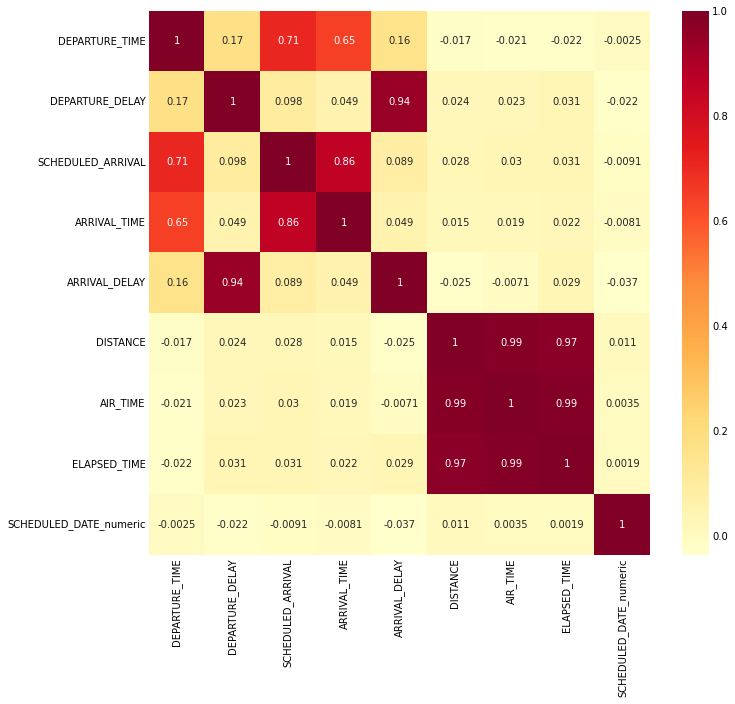

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd')
plt.show()